In [1]:
import argparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import csv
import math
import json
import ast
import cv2
import time
import logging
import warnings
import seaborn as sns
import pickle
import lightgbm as lgb
import xgboost as xgb
import random
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from clean_v3 import *
from generate_explanation import *


In [4]:
path_to_session='/data/VR_NET/folders/Arena_Clash/44_1_Arena_Clash/'
cleaned_session=clean(path_to_session)
#save the session please
gen_explanation('XGBoost', 'dataset3.csv', cleaned_session, 'log_1720005500')


In [5]:
cleaned_session

,frame,timestamp,MS_rating,IndTrig_L,IndTrig_R,HandTrig_L,HandTrig_R,Thumb_L_x,Thumb_R_x,Thumb_L_y,...,c_acceleration1,c_velocity2,c_acceleration2,c_velocity3,c_acceleration3,text_presence,change in brightness,diff_HE_yaw,diff_HE_roll,diff_HE_pitch
0,3620,1695870194753,NaN,0.0000000000,0.0000000000,0.0000000000,0.0000000000,NaN,NaN,NaN,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1,0.0000000000,0.0061363844,0.0697911774,0.0301347300
1,3630,1695870194913,2.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,NaN,NaN,NaN,...,-670.5785333179,1.4475286007,9.0470537543,10.2026462555,63.7665390968,1,4.7425583965,0.0307227386,0.0315209943,0.1274297551
2,3640,1695870195090,NaN,0.0000000000,0.0000000000,0.0000000000,0.0000000000,NaN,NaN,NaN,...,-196.2408297499,-4.1800461246,-31.7942074878,52.7957118837,240.6387888600,1,5.6560132576,0.0418688544,0.0424801673,0.2634879903
3,3650,1695870195240,NaN,0.0000000000,0.0000000000,0.0000000000,0.0000000000,NaN,NaN,NaN,...,150.9323867252,5.0306002299,61.4043090303,87.6492818197,232.3571329063,1,2.2667692551,0.0604883221,0.0145585456,0.1961581517
4,3660,1695870195412,NaN,0.0000000000,0.0000000000,0.0000000000,0.0000000000,NaN,NaN,NaN,...,556.2418680997,8.0042772515,17.2888198930,23.1060427289,-375.2513900628,1,0.6036379419,0.0296551676,0.0283833875,0.1099420680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,15050,1695870376370,NaN,0.0000000000,0.0000000000,0.5894993544,0.0000000000,0.6380433412,NaN,-0.7700004512,...,55.7787598360,-0.5108604968,-1.9346275506,2.0841914164,-4.3772231740,1,0.4698745265,0.0035693562,0.0451602206,0.0316365527
1144,15060,1695870376520,NaN,0.0000000000,0.0000000000,0.5914529562,0.0000000000,0.5344824394,NaN,-0.8451795797,...,-0.7744517498,-0.4052607218,0.7039985000,1.5945784251,-3.2640866084,1,0.2480310922,0.0017971352,0.0840210893,0.0092576009
1145,15070,1695870376658,NaN,0.0000000000,0.0000000000,0.5887667537,0.0000000000,0.3863813441,NaN,-0.9223391225,...,-1.7562558035,-0.3191491832,0.6239966569,1.9078237423,2.2698936030,1,0.0577651515,0.0396971783,0.0525598940,0.1457512214
1146,15080,1695870376799,NaN,0.0000000000,0.0000000000,0.5985347629,0.0000000000,-0.4365636898,NaN,0.8996733545,...,-0.8376990327,-0.3340700839,-0.1058219912,1.7501276436,-1.1184120478,1,0.7360400884,0.0197007898,0.1109421608,0.0819476383


In [3]:
ls /data/VR_NET/folders/Arena_Clash_3/44_1_Arena_Clash

ls: cannot access '/data/VR_NET/folders/Arena_Clash_3/44_1_Arena_Clash': No such file or directory


In [6]:
with open('/home/sharedFolder/modelling/dataset3/log_1720005500/XGBoost/model.pkl', 'rb') as file:
    model = pickle.load(file)

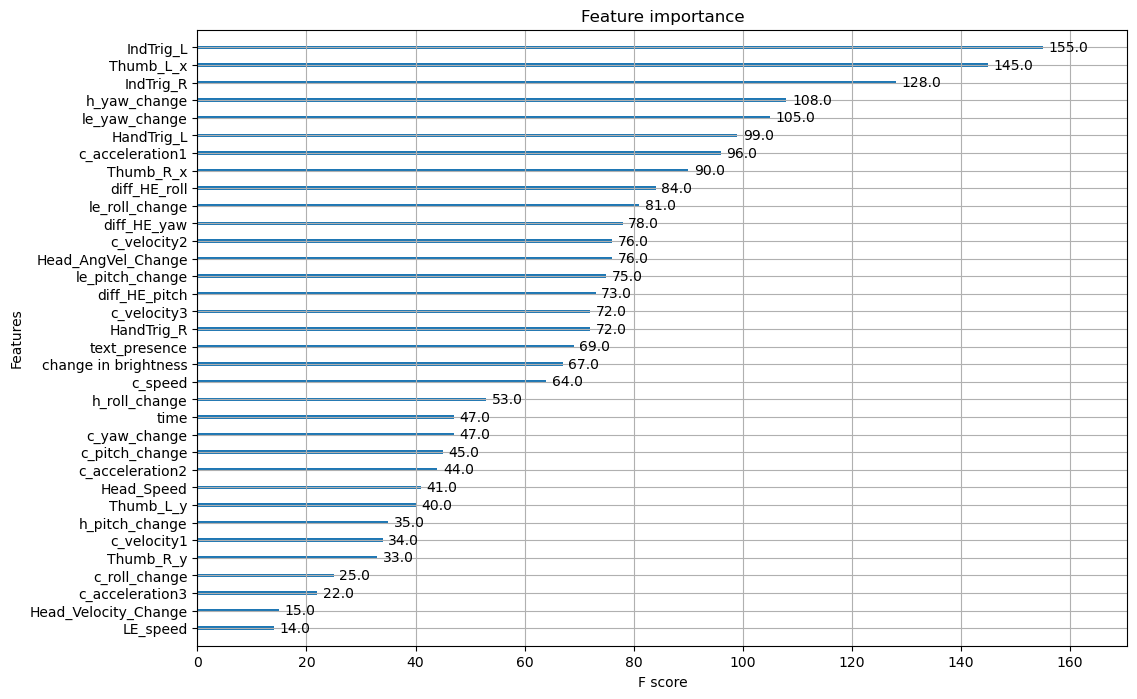

In [8]:
import matplotlib.pyplot as plt

# Plot feature importance
fig, ax = plt.subplots(figsize=(12, 8))
xgb.plot_importance(model, ax=ax)
plt.show()